In [2]:
from pandas import Series, DataFrame

In [146]:
import json

## 구 경계 데이터 불러오기

In [65]:
with open("Seoul_Gu.json", "r") as f:
    data = json.load(f)

In [66]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.012, 37.582],
      [127.015, 37.582],
      [127.016, 37.582],
      [127.017, 37.582],
      [127.017, 37.581],
      [127.017, 37.58],
      [127.018, 37.58],
      [127.018, 37.579],
      [127.018, 37.578],
      [127.019, 37.578],
      [127.02, 37.578],
      [127.019, 37.578],
      [127.02, 37.578],
      [127.02, 37.579],
      [127.021, 37.579],
      [127.022, 37.579],
      [127.023, 37.578],
      [127.023, 37.577],
      [127.023, 37.576],
      [127.023, 37.575],
      [127.023, 37.572],
      [127.018, 37.57],
      [127.015, 37.57],
      [127.001, 37.569],
      [126.997, 37.569],
      [126.99, 37.568],
      [126.976, 37.569],
      [126.969, 37.568],
      [126.967, 37.566],
      [126.954, 37.579],
      [126.957, 37.58],
      [126.958, 37.584],
      [126.958, 37.594],
      [126.958, 37.598],
      [126.953, 37.6],
      [126.954, 37.605

In [126]:
# 중구 데이터 index 찾기
for i in range(25):
    if (data['features'][i]['properties']['SIG_KOR_NM']=='중구'):
        print(i)
    else : pass

1


In [75]:
len(data['features'])

25

In [76]:
data['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.012, 37.582],
    [127.015, 37.582],
    [127.016, 37.582],
    [127.017, 37.582],
    [127.017, 37.581],
    [127.017, 37.58],
    [127.018, 37.58],
    [127.018, 37.579],
    [127.018, 37.578],
    [127.019, 37.578],
    [127.02, 37.578],
    [127.019, 37.578],
    [127.02, 37.578],
    [127.02, 37.579],
    [127.021, 37.579],
    [127.022, 37.579],
    [127.023, 37.578],
    [127.023, 37.577],
    [127.023, 37.576],
    [127.023, 37.575],
    [127.023, 37.572],
    [127.018, 37.57],
    [127.015, 37.57],
    [127.001, 37.569],
    [126.997, 37.569],
    [126.99, 37.568],
    [126.976, 37.569],
    [126.969, 37.568],
    [126.967, 37.566],
    [126.954, 37.579],
    [126.957, 37.58],
    [126.958, 37.584],
    [126.958, 37.594],
    [126.958, 37.598],
    [126.953, 37.6],
    [126.954, 37.605],
    [126.951, 37.608],
    [126.95, 37.611],
    [126.951, 37.614],
    [126.949, 37.623],
    [126.95, 37.626],
  

## 좌표변환 함수 선언

In [1]:
from pyproj import Proj, transform
import numpy as np
import pandas  as pd

#  Projection 정의
# UTM-K
proj_UTMK = Proj(init='epsg:5179') # UTM-K(Bassel) 도로명주소 지도 사용 중

# WGS1984
proj_WGS84 = Proj(init='epsg:4326') # Wgs84 경도/위도, GPS사용 전지구 좌표


# x, y 컬럼을 이용하여 UTM-K좌표를 WGS84로 변환한 Series데이터 반환
def transform_utmk_to_w84(df):
    return pd.Series(transform(proj_UTMK, proj_WGS84, df['x'], df['y']), index=['x', 'y'])

def transform_w84_to_utmk(df):
    return pd.Series(transform(proj_WGS84, proj_UTMK, df['x'], df['y']), index=['x', 'y'])


C:\Users\yoons\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\yoons\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## 중구

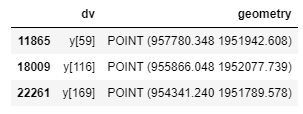

In [3]:
rawdata_중구 ={'x':[957780.348,955866.048,954341.240],'y':[1951942.608,1952077.739,1951789.578]}
location_중구 = DataFrame(rawdata_중구)
location_중구

,x,y
0,957780.348,1951942.608
1,955866.048,1952077.739
2,954341.240,1951789.578


In [10]:
location_중구[['w84_x','w84_y']] = location_중구.apply(transform_utmk_to_w84,axis=1)

C:\Users\yoons\AppData\Local\Temp\ipykernel_11452\406505562.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return pd.Series(transform(proj_UTMK, proj_WGS84, df['x'], df['y']), index=['x', 'y'])
C:\Users\yoons\AppData\Local\Temp\ipykernel_11452\406505562.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return pd.Series(transform(proj_UTMK, proj_WGS84, df['x'], df['y']), index=['x', 'y'])
C:\Users\yoons\AppData\Local\Temp\ipykernel_11452\406505562.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return pd.Series(transform(proj_UTMK, proj_WGS84, df['x'], df['y']), index=['x', 'y'])


In [11]:
location_중구

,x,y,w84_x,w84_y
0,957780.348,1951942.608,127.021930,37.565880
1,955866.048,1952077.739,127.000246,37.567008
2,954341.240,1951789.578,126.982998,37.564336


In [20]:
import folium
import pandas
from folium import plugins

In [147]:
map_중구 = folium.Map(location = [37.56100278, 126.9996417],
                zoom_start = 13)
map_중구

In [148]:
folium.Marker(
location = [37.565880, 127.021930],
popup = '중구_선정1',
icon = folium.Icon(color = 'green',icon = 'star')).add_to(map_중구)

In [149]:
folium.Marker(
location = [37.567008, 127.000246],
popup = '중구_선정2',
icon = folium.Icon(color = 'green',icon = 'star')).add_to(map_중구)

In [150]:
folium.Marker(
location = [37.564336, 126.982998],
popup = '중구_선정3',
icon = folium.Icon(color = 'green',icon = 'star')).add_to(map_중구)

In [151]:
folium.Choropleth(
geo_data = data['features'][1]).add_to(map_중구)

In [152]:
map_중구

## 종로구

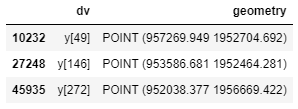

In [12]:
rawdata_종로 ={'x':[957269.949,953586.681,952038.377],'y':[1952704.692,1952464.281,1956669.422]}
location_종로 = DataFrame(rawdata_종로)
location_종로

,x,y
0,957269.949,1952704.692
1,953586.681,1952464.281
2,952038.377,1956669.422


In [13]:
location_종로[['w84_x','w84_y']] = location_종로.apply(transform_utmk_to_w84,axis=1)

C:\Users\yoons\AppData\Local\Temp\ipykernel_11452\406505562.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return pd.Series(transform(proj_UTMK, proj_WGS84, df['x'], df['y']), index=['x', 'y'])
C:\Users\yoons\AppData\Local\Temp\ipykernel_11452\406505562.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return pd.Series(transform(proj_UTMK, proj_WGS84, df['x'], df['y']), index=['x', 'y'])
C:\Users\yoons\AppData\Local\Temp\ipykernel_11452\406505562.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return pd.Series(transform(proj_UTMK, proj_WGS84, df['x'], df['y']), index=['x', 'y'])


In [14]:
location_종로

,x,y,w84_x,w84_y
0,957269.949,1952704.692,127.016106,37.572725
1,953586.681,1952464.281,126.974412,37.570380
2,952038.377,1956669.422,126.956604,37.608202


In [ ]:
#126.9816417
#37.57037778

In [178]:
map_종로 = folium.Map(location = [37.57037778, 126.9816417],
                zoom_start = 11)
map_종로

In [179]:
folium.Marker(
location = [37.572725, 127.016106],
popup = '종로구_선정1',
icon = folium.Icon(color = 'green',icon = 'star')).add_to(map_종로)

folium.Marker(
location = [37.570380, 126.974412],
popup = '종로구_선정2',
icon = folium.Icon(color = 'green',icon = 'star')).add_to(map_종로)

folium.Marker(
location = [37.608202,126.956604],
popup = '종로구_선정3',
icon = folium.Icon(color = 'green',icon = 'star')).add_to(map_종로)

In [180]:
map_종로

In [181]:
folium.Choropleth(
geo_data = data['features'][0]).add_to(map_종로)

In [182]:
map_종로